# Books and Games

## Using Python to model your way out of a tight situation

Steven F. Lott

@slott56@fosstodon.org

# Books and Games

Fiction authors talk a lot about "World-Building"

Books parallel Table-Top Role-Playing Game (TTRPG) design

-  Except books have a hyper-narrow focus

-  Books are "closed" over characters and actions

Real TTRPG night means your friends mess with your dungeon story

# I'll be leaving now...

This actually has some application outside books and games.

This is really about building models.

User Experience Design and creating personas.

Database design and creating data distributions and transaction mixes.

# Model Building = World Building

# Qualifications

Not many. I'm a **non-fiction** writer.

Zero traditionally published Epic Fantasy or Western Horror books. Lots of rejections.

Zero unique game designs.

**Decades of TTRPG** Games designed by other folks. (D&D <= 1e and Champions.)

I'm a **user** of TTRPG models.

# Agenda

## I. World-Building in General

## II. Things we can simulate in Python

1. Terrain

2. Character Descriptions

3. Story Arcs (really?)

4. Languages

## III. Resolution

# I. World-Building

Stories are drama. Drama stems from conflict.

Lots of choices here:

- Resources

- Culture

- Religion

- Spaces v. Tabs

- Inheritance v. Delegation

# Character Design

Your stories need to have characters readers identify with.

Your characters should learn something.

>    "It's not getting all the tests to pass, 
>     it's the friends we make while exposing their bad code."
     
Character evolution is called their "arc".

# World-Building

How about we leave it at that?

Maybe afer I win a few Hugo awards, we'll revist this.

We have a number of obstacles.

(After all, that's what a story is about.)

How do we build a plausible world?

# II. Things we can simulate

We can think a lot. But that leads to brain cramps.

We can model or simulate some things. That leads to code.

1. Terrain -- a basis for conflict

2. Character Descriptions -- colorful details

3. Story Arcs (really?) -- the real conflict

4. Languages -- more colorful details

# 1. Terrain Generation

I'm prefer hex maps.

(I know, some game designers hate them.)

I prefer flat-topped hexes: N-S are easy to find. 

E-W has this 23° axial tilt issue. Summer East? Winter East?

In [1]:
import matplotlib.pyplot as plt
from math import sqrt, cos, sin, radians

In [2]:
w_fig, h_fig = 5.0, 5.0  # Inches
cells = 18

In [3]:
r = 1
h = sqrt(3) * r
w = 2 * r

In [4]:
columns = cells
rows = int(4 * columns) // 3

In [5]:
columns, rows

(18, 24)

In [6]:
def hex(col, row):
    x_o = r * 3/2 * col + r
    y_o = r * sqrt(3)/2 * row + r
    path = []
    for side in range(0, 6):
        theta = radians(60 * side)
        x = cos(theta) * r + x_o
        y = sin(theta) * r + y_o
        path.append((x, y))
    path.append(path[0])
    return path

In [7]:
import random

In [8]:
def seed_image():
    fig = plt.figure(figsize=(w_fig, h_fig), )
    ax = fig.add_axes([0, 0, columns*r, rows*r], frameon=False, aspect=1)
    
    for col in range(columns):
        for row in range(col % 2, rows, 2):
            path = hex(col, row)
            ax.plot([pt[0] for pt in path], [pt[1] for pt in path], '-k', lw=3)
    
    colors = ['tab:red', 'tab:purple', 'tab:blue', 'tab:green', 'tab:olive']
    for i in range(5):
        x = random.randint(0, col)
        y = random.randrange(x % 2, rows, 2)
        path = hex(x, y)
        ax.fill([pt[0] for pt in path], [pt[1] for pt in path], colors[i])

In [9]:
seed_image()
plt.show()

# Okay Hexagons...

Coordinates are complicated.

Use a "double height grid" -- even columns have even row cells, odd columns have odd row cells.

Define adjancy rules based on this doubled grid.

```
    doubleheight_directions = [
      (+1, +1), (+1, -1), ( 0, -2), 
      (-1, -1), (-1, +1), ( 0, +2), 
    ]
```

# City and Country


```
class City:
    def __init__(self, color):
        ...
    def place(self, x, y) -> None:
        ...
    def occupies(self) -> set(tuple[int, int]):
        ...
    def border(self) -> set(tuple[int, int]):
        ...
```

```
class Empire:
    def add_city(self, city):
        ...
```

# Grow Cities

1. Plant a few cities

2. For a few generations (about 48 for the maps I used):

    a. Get the set of the "adjacent to a city's border" cells.

    b. Subtract all currently occupied cells.

    c. Pick a random unoccupied adjacent cells and expand the city.

# 2. Character Descriptions

Unicode? ASCII? EBCDIC?

In [10]:
Feature = [
"Hair Curl", "Hair Length", "Hair Coverage",
"Ears", "Eyebrows", "Eyes", "Nose",
"Facial Hair", "Teeth", "Lips", "Chin", 
"Shoulders", "Arms", "Hands", 
"Chest", "Gut", 
"Hips", "Thighs", "Knees", "Feet",
"Overall Size"
]

# Want Small-Typical-Large Distribution 

A "normal" distribution with two tails

Quantized so we can roll dice.

-  TTRPG mechanic -- roll 3d6 and lookup on a table

-  Multiple dice approximate a normal distibution

-  More dice = more normal

# The 3d6 Complication

The range of values is 3 to 18 has 16 distinct values.

We want to map these to 5 (or maybe 6) buckets.

Categorize the 16 values to preserve normality...

*Brain Cramp*.

# Pascal's Triangle

Expected results for a binary coin-toss with $n$ coins.

But it gives normalish distributions with any number of buckets.

- 1, 4, 6, 4, 1. Has 5 buckets.

- 1, 6, 10, 10, 5, 1. Has 6 buckets.

This is more adaptable.

# After some fiddling...

Slightly asymmetric, but looked "good" to me.

In [11]:
SPECTRUM = {
    "Missing": 1/32, 
    "Injured": 5/32, 
    "Small": 10/32, 
    None: 10/32, 
    "Large": 6/32,
    }

# The d20 TTRPG Mechanic

<table>
    <tr><th>Roll</th><th>Outcome</th></tr>
    <tr><td>1</td><td>Missing</td></tr>
    <tr><td>2-4</td><td>Injured</td></tr>
    <tr><td>5-10</td><td>Small</td></tr>
    <tr><td>11-17</td><td>Typical</td></tr>
    <tr><td>18-19</td><td>Large</td></tr>
    <tr><td>20</td><td>Large</td></tr>
</table>

Roll d20 and search the table for the range that brackets the number

# Search for a bracketing range?

*Brain Cramp*

# Instead...

Seed a big, flat list with multiple copies.

```
features = (
    1 * ["Missing"] + 
    5 * ["Injured"] +
    10 * ["Small"] + 
    10 * [None] +
    6 * ["Large"]
)
```

Then use `random.choice()`. Fun and Done.

# 3. Story Arcs

Stick with me on this...

Viewed at the highest level of abstraction there are two plots:

- Person falls down a man-hole.

- Person climbs out of a man-hole.

Plus the combo platters with these two (in either order.)

# Too abstract?

Movies have 3 acts: Setup. Confrontation. Resolution.

The second act has two parts. 

> (Check your watch 60 minutes into a two-hour movie.)

A little more useful decomposition, but still **very** abstract.

# The Joseph Campbell Monomyth

I could go on...

*Brain Cramp*

# Tarot Card Fortune Telling

Really.

There's a character. Past. Future. Obstacles to Overcome. Traps to Avoid. 

All the things.

In [12]:
from typing import NamedTuple

class Minor(NamedTuple):
    """A card in the "minor arcana" of a Tarot deck.

    >>> m = Minor("Page", "Swords", "Spy")
    >>> m.name
    'Page Swords'
    >>> m.url
    'http://www.sacred-texts.com/tarot/pkt/img/swpa.jpg'
    """


In [13]:
from typing import NamedTuple

class Major(NamedTuple):
    """A card in the "major arcana" of a Tarot deck.

    >>> m = Major("XIX", "Sun", "Achievement")
    >>> m.name
    'XIX Sun'
    >>> m.url
    'http://www.sacred-texts.com/tarot/pkt/img/ar19.jpg'

    >>> v = ["0", "I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX"]
    >>> for n, r in enumerate(v):
    ...     c = Major(r, str(n), str(n))
    ...     assert c.rank_int == n, f"{c.name!r}: {c.rank_int} != {n}"
    """


In [14]:
minor_raw = [
    {"rank": "Ace", "suit": "Wands", "text": "Gift"},
    {"rank": "Ace", "suit": "Swords", "text": "Triumph through battle"},
    {"rank": "Ace", "suit": "Cups", "text": "Abundance (food, 1st aid)"},
    ...
    ]

major_raw = [
    {
        "rank": "0",
        "image": "Fool",
        "text": "Choose correctly or fail.  Drunk, drugged, lost, confused",
    },
    ...
    ]

In [17]:
from pathlib import Path
def screenshot():
    with Path('Screenshot 2023-12-06 at 10.53.57 AM.png').open('rb') as image_file:
        image = plt.imread(image_file)
    fig, ax = plt.subplots()
    im = ax.imshow(image)
    ax.axis('off')
    plt.show()

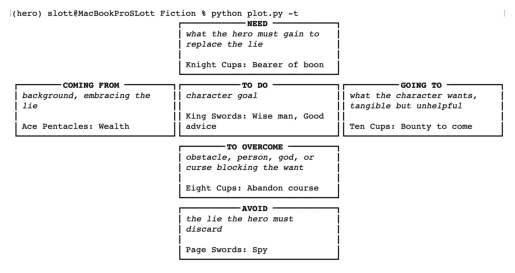

In [18]:
screenshot()

# For TTRPG

I used this for bad-guy and non-player-character story arcs.

I had concrete motivations and obstacles.

# For Novels

I generate a few and look for inspiration for characters.

They get adjusted as needed to try and make a more compelling story.

# 4. Languages

Very tricky stuff here. Potential Brain Cramps. 

My background is weak in NLP.

But I have NLTK which makes me feel like I almost know what I'm doing.

This is "conlang" constructed languages.

# Lexicon

This is fun.

Start with "digraphs" -- two letter combinations.

Last letter generated defines a subset of possible letter pairs.

A forest of Markov Chains based on letter.

# Digraph Frequency

Digraphs are not uniform. 

- "th" and "he" really popular in English.

- "ld" and "ur" not so common.

Starting letters, similarly.

- "t", "a", "s" begin many words.

- "z", "x", "q" not so popular.

# Digraph Chaining

```
    c_0 = weighted_choice(self.first_letters)
    w = [c_0]

    while len(w) < target_length:
        if w[-1] in self.markov:
            w.append(weighted_choice(self.markov[w[-1]]))
        else:
            target_length += 2
            c_1, c_2 = weighted_choice(self.digraphs)
            w.extend(["'", c_1, c_2])
    return ''.join(w)
```

# Grammar

I rely on the user preparing a tagged sample of their sentence.

```
"(S (VP (TV kill) (NP (DET the) (NP mage))))"
```

I wrote some transformation rules to restructure sentences into my conlang.

```
TransformRule(
    "(S (NP $n) (VP $v $n2))",
    "(S (VP $v) (NP $n) (PP a $n2))")
```

# I don't parse the English

Not making a robust English to conlang translator.

Create a few key phrases that baffle the main characters.

Also.

Folks who know both languages make appropriate grammar mistakes.

The goal is *consistency*.

# Act III -- Finale

When in doubt... 

Model it.

Define some plausible features.

Or alternatives.

See if you can find metrics and ranges of values for these things.

Create a "mechanic" -- cards or dice.

(Selection without replacement or selection with replacement.)

# UX Design

Users are in conflict with *something*.

Often it's a lack of actionable information.

It's difficulty making an optimal decision.

UX designs are models. Often with altenatives.

# Database Design

What is the distribution of actual values used for search?

What is the mix of transactions?

What is the rate of transactions?

Don't know? Make plausible models. Simulate.

# Your Actions

Don't overthink modeling.

- Don't **start** with AI-based unsupervised machine-learning.

Write the simplest model offering some match with observations.

- Essential statistics -- mean, standard deviation, $\chi^2$.

Make a hypothesis. Test it against real-world measurements.

Have fun. Software development is story-telling.